In [13]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt 


In [14]:
data_set= pd.read_csv("JBFCY.csv")

In [15]:
data_set

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-09,11.74,11.74,11.72,11.72,11.531006,900
1,2020-10-12,11.74,11.74,11.74,11.74,11.550684,200
2,2020-10-13,11.65,11.65,11.65,11.65,11.462135,600
3,2020-10-14,11.65,11.65,11.65,11.65,11.462135,0
4,2020-10-15,11.65,11.65,11.65,11.65,11.462135,100
...,...,...,...,...,...,...,...
498,2022-10-03,15.39,15.39,15.39,15.39,15.390000,300
499,2022-10-04,15.39,15.39,15.39,15.39,15.390000,0
500,2022-10-05,16.84,16.84,16.84,16.84,16.840000,300
501,2022-10-06,16.84,16.84,16.84,16.84,16.840000,0


In [16]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB


In [17]:
data_set.shape

(503, 7)

In [21]:
data_set['Date'] = pd.to_datetime(data_set.Date)
data_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-09,11.74,11.74,11.72,11.72,11.531006,900
1,2020-10-12,11.74,11.74,11.74,11.74,11.550684,200
2,2020-10-13,11.65,11.65,11.65,11.65,11.462135,600
3,2020-10-14,11.65,11.65,11.65,11.65,11.462135,0
4,2020-10-15,11.65,11.65,11.65,11.65,11.462135,100


In [23]:
data_set.sort_values(by='Date', inplace=True)
data_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-09,11.74,11.74,11.72,11.72,11.531006,900
1,2020-10-12,11.74,11.74,11.74,11.74,11.550684,200
2,2020-10-13,11.65,11.65,11.65,11.65,11.462135,600
3,2020-10-14,11.65,11.65,11.65,11.65,11.462135,0
4,2020-10-15,11.65,11.65,11.65,11.65,11.462135,100


In [24]:
def timeseries (x_axis, y_axis, y_axis2, y_axis3, y_axis4, x_label):
    plt.figure(figsize = (20, 12))
    plt.title('Stock Price Chart',{'fontsize': 24})
    plt.plot(x_axis, y_axis,  '-y', label = 'Open',)
    plt.plot(x_axis, y_axis2, '-b', label = 'Close')
    plt.plot(x_axis, y_axis3, '--g', label = 'High')
    plt.plot(x_axis, y_axis4, '--r', label = 'Low')
    plt.xlabel(x_label, {'fontsize': 15}) 
    plt.ylabel('Stock Price Movement', {'fontsize': 15})
    plt.legend(fontsize=20)

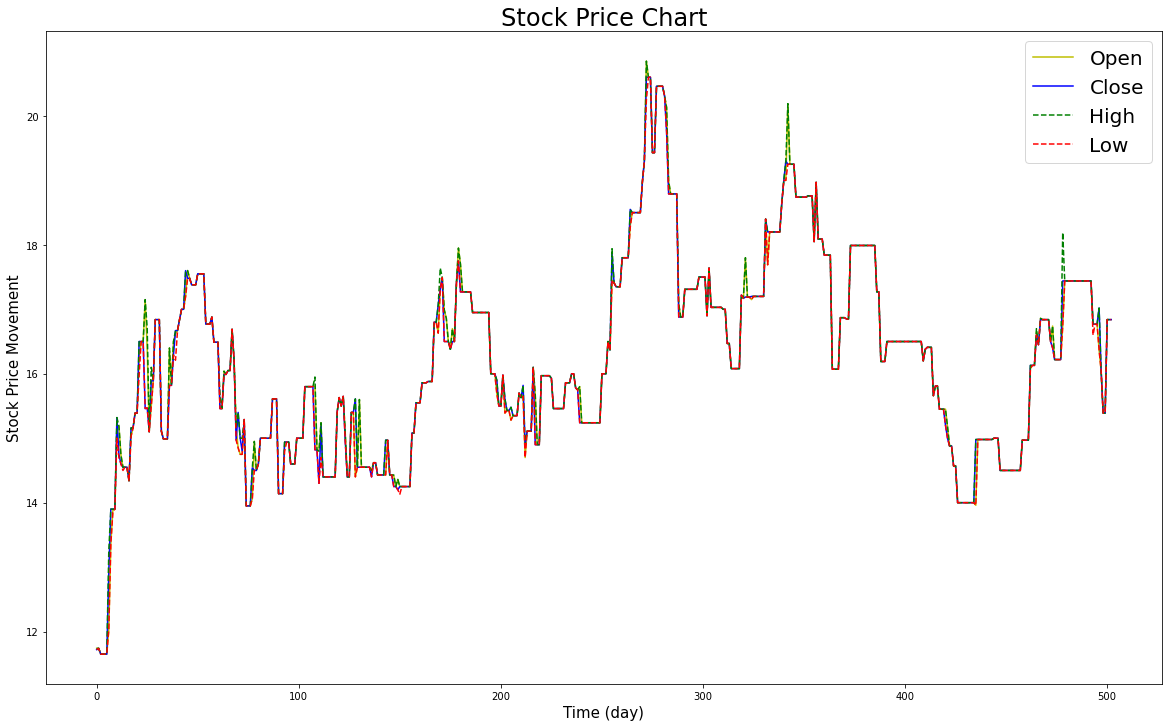

In [9]:
data_frame = data_set.copy()
timeseries(data_set.index, data_frame['Open'],data_frame['Close'], data_frame['High'],data_frame['Low'], 'Time (day)')

In [34]:
data_set_close = data_set[['Date','Close']]
print("Shape of close dataframe:", data_set_close.shape)
data_set_close

Shape of close dataframe: (503, 2)


,Date,Close
0,2020-10-09,11.72
1,2020-10-12,11.74
2,2020-10-13,11.65
3,2020-10-14,11.65
4,2020-10-15,11.65
...,...,...
498,2022-10-03,15.39
499,2022-10-04,15.39
500,2022-10-05,16.84
501,2022-10-06,16.84


In [35]:
del data_set_close['Date']


In [36]:
scaler=MinMaxScaler(feature_range=(0,1))
data_set_close=scaler.fit_transform(np.array(data_set_close).reshape(-1,1))
print(data_set_close.shape)

(503, 1)


In [37]:
training_size=int(len(data_set_close)*0.8)
test_size=len(data_set_close)-training_size
train_data,test_data=data_set_close[0:training_size,:],data_set_close[training_size:len(data_set_close),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (402, 1)
test_data:  (101, 1)


In [66]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-look_back-1):
        v = X[i:(i+look_back),0]
        Xs.append(v)
        ys.append(X[i+look_back])
        
    return np.array(Xs), np.array(ys)

X_train, y_train = create_dataset(train_data,15)
X_test, y_test = create_dataset(test_data,15)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (386, 15)
y_train:  (386, 1)
X_test:  (85, 15)
y_test (85, 1)


In [94]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
def create_gru(units):
    model = Sequential()
    # Input layer 
    model.add(GRU (units = units, return_sequences = True, 
                 input_shape = [X_train.shape[1], 1]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
   
    return model
model_gru = create_gru(64)


def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 400, validation_split = 0.2,
                    batch_size = 4, shuffle = False)
    return history

history_gru = fit_model(model_gru)

Epoch 1/400
77/77 [==============================] - 4s 15ms/step - loss: 79.2099 - val_loss: 17.2475
Epoch 2/400
77/77 [==============================] - 0s 5ms/step - loss: 4.5810 - val_loss: 4.7438
Epoch 3/400
77/77 [==============================] - 0s 5ms/step - loss: 3.3965 - val_loss: 2.8905
Epoch 4/400
77/77 [==============================] - 0s 5ms/step - loss: 3.6023 - val_loss: 2.5820
Epoch 5/400
77/77 [==============================] - 0s 5ms/step - loss: 3.4205 - val_loss: 2.6612
Epoch 6/400
77/77 [==============================] - 0s 5ms/step - loss: 3.5718 - val_loss: 2.7092
Epoch 7/400
77/77 [==============================] - 0s 5ms/step - loss: 3.3633 - val_loss: 2.6349
Epoch 8/400
77/77 [==============================] - 0s 6ms/step - loss: 3.2506 - val_loss: 2.9619
Epoch 9/400
77/77 [==============================] - 0s 5ms/step - loss: 3.1688 - val_loss: 2.4618
Epoch 10/400
77/77 [==============================] - 0s 6ms/step - loss: 3.5390 - val_loss: 2.5547
Epoch 

In [95]:
model_gru.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 15, 64)            12864     
                                                                 
 dropout_8 (Dropout)         (None, 15, 64)            0         
                                                                 
 gru_11 (GRU)                (None, 64)                24960     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________


3/3 [==============================] - 1s 3ms/step
GRU:
Mean Absolute Error: 3.6803
Root Mean Square Error: 4.3012



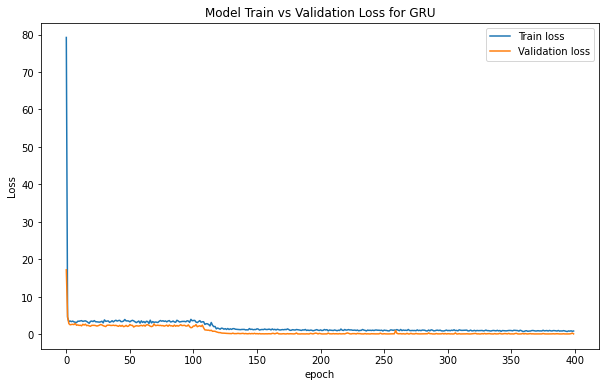

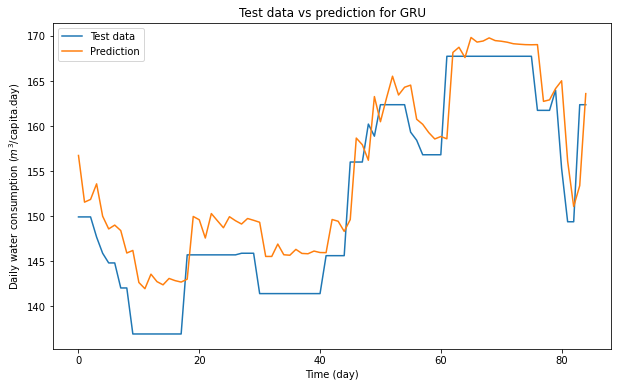

In [96]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    plt.savefig('C:/Users/basco/Jupyter/'+model_name+'.jpg', format='jpg', dpi=1000)

plot_loss (history_gru, 'GRU')

# Transform data back to original data space
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction

prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='Test data')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Daily water consumption ($m^3$/capita.day)')
       
plot_future(prediction_gru, 'GRU', y_test)
# Calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

evaluate_prediction(prediction_gru, y_test, 'GRU')

In [115]:
df_close = data_set[['Date','Close']]
train_predict=model_gru.predict(X_train)
test_predict=model_gru.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 3ms/step


((386, 1), (85, 1))

In [116]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
train_predict.shape, test_predict.shape

((386, 1), (85, 1))

In [114]:
time_step = 15
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 15
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  15


In [117]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]


In [121]:
# plotting the comparison of last days and next days
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(data_set_close[len(data_set_close)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 15 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 15 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()